من با استفاده از ابزار apktool یک اپلیکیشن رو مهندسی معکوس کردم و ویژگی های مورد نیاز خودم رو استخراج کردم، ویژگی هایی که دقیقا داخل دیتاست هستش  برای اینکار از کدی که در ایمیل براتون ارسال میکنم استفاده کردم، با استفاده از این کد میشود بصورت استاتیک یک apkرا مورد بررسی قرار داد

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("malware_dataset.csv")

<ipython-input-2-67ef9ed76dd3>:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("malware_dataset.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


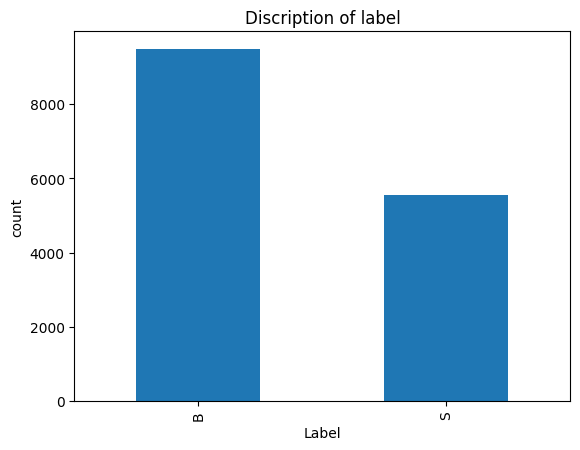

In [ ]:
df['class'].value_counts().plot(kind='bar')
plt.title("Discription of label")
plt.xlabel("Label")
plt.ylabel("count")
plt.show()

In [ ]:
df.replace('?',np.nan,inplace=True)
df.replace('S',1,inplace=True)
df.replace('B',0,inplace=True)
# delelt nan value:
df.dropna(inplace=True)

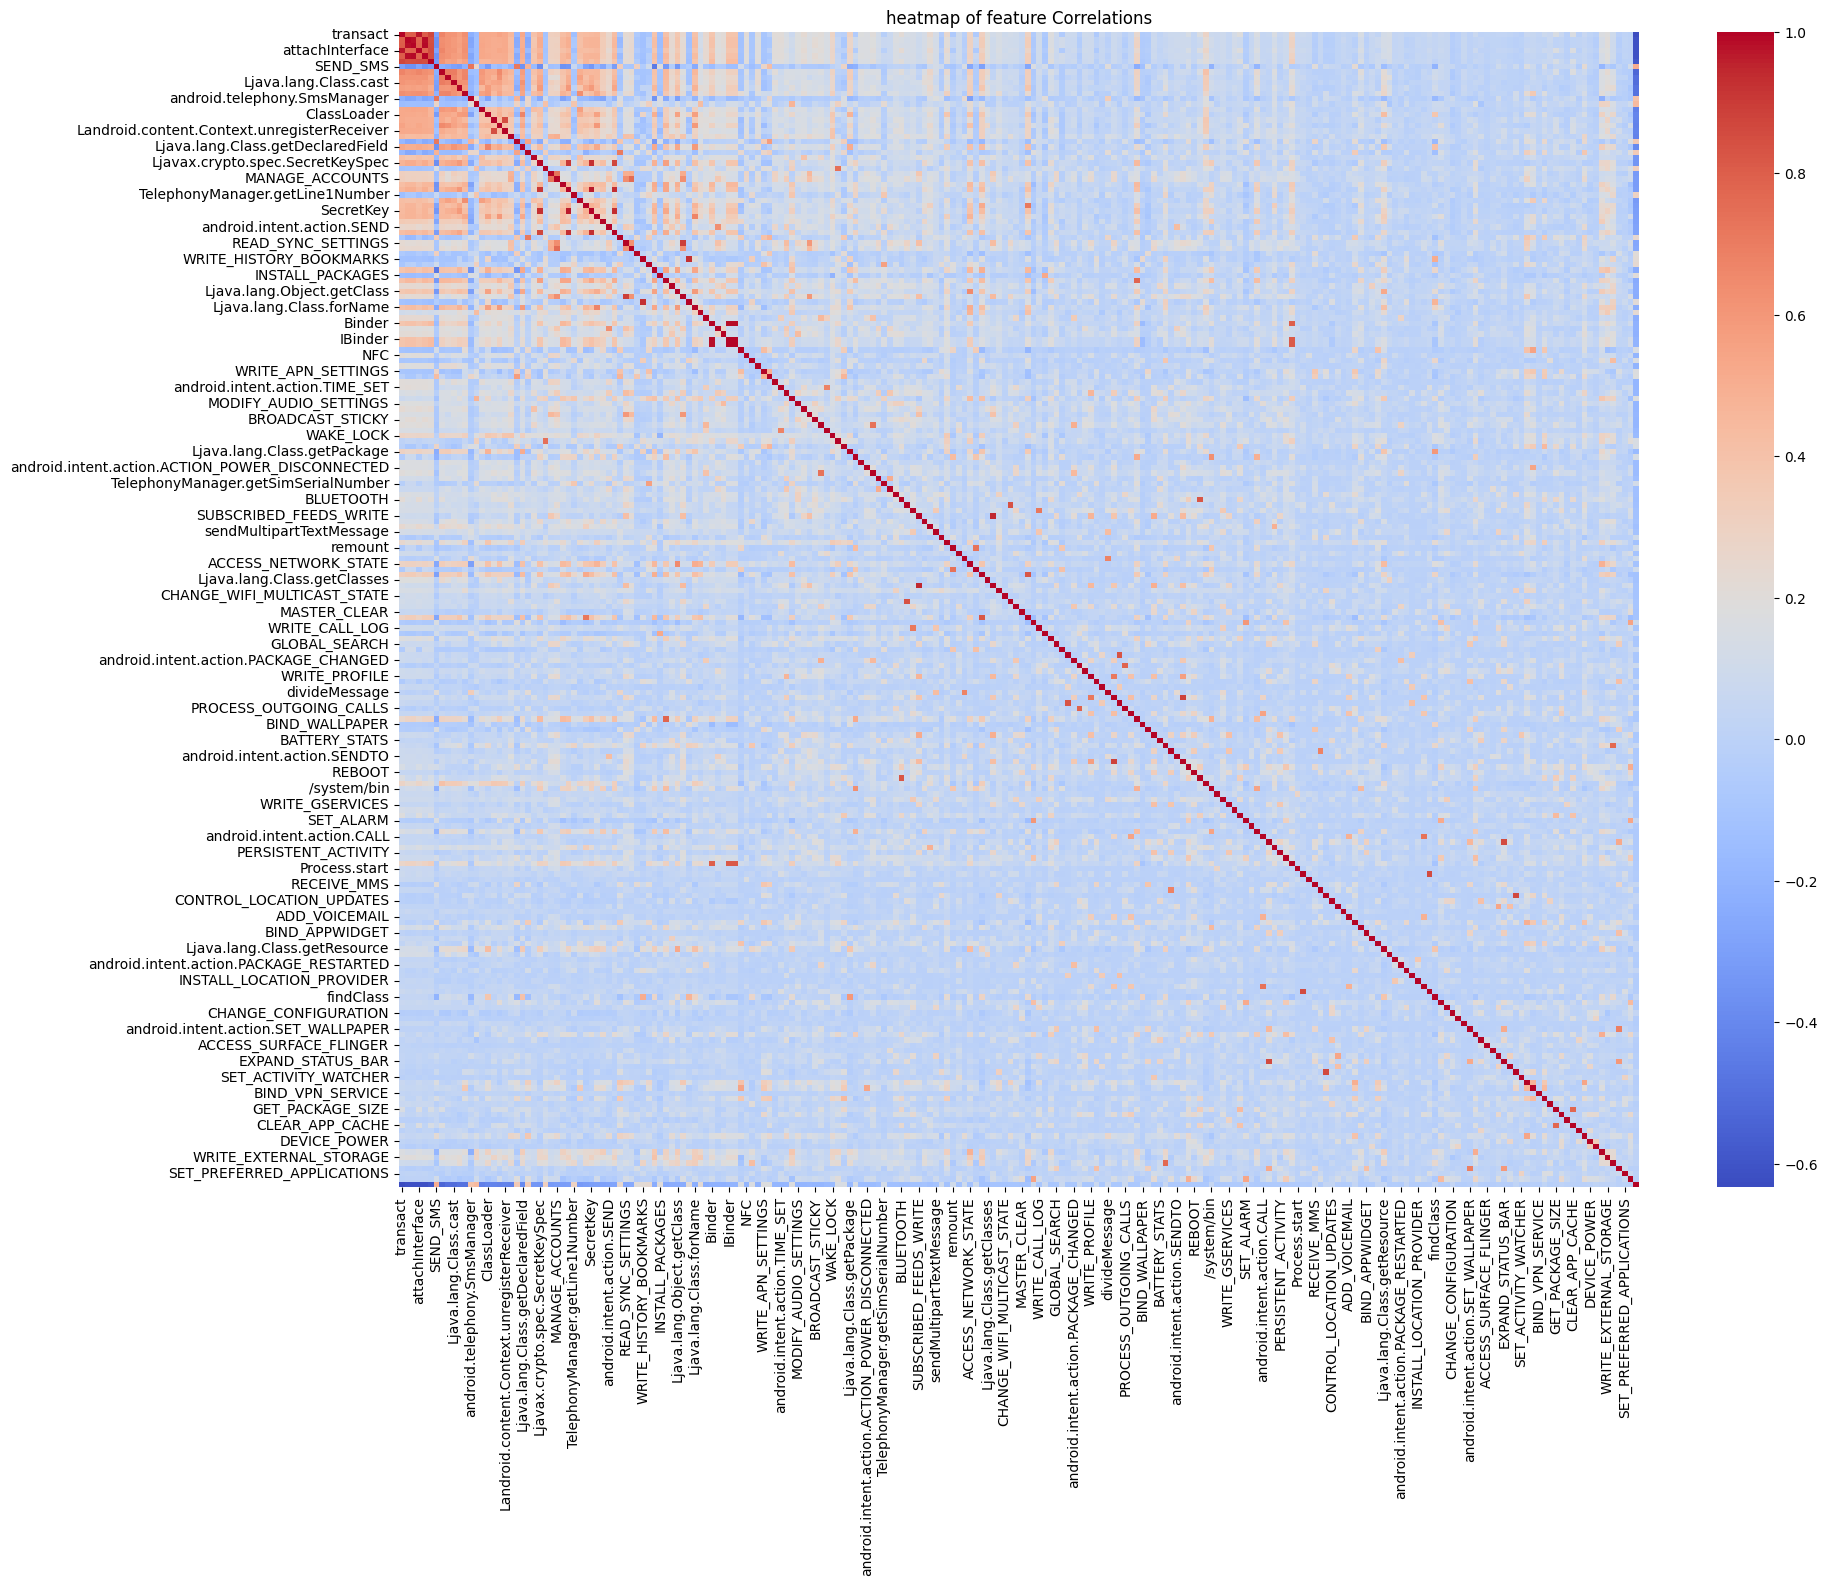

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='coolwarm',annot=False)
plt.title('heatmap of feature Correlations')
plt.show()

<Figure size 2000x1500 with 0 Axes>

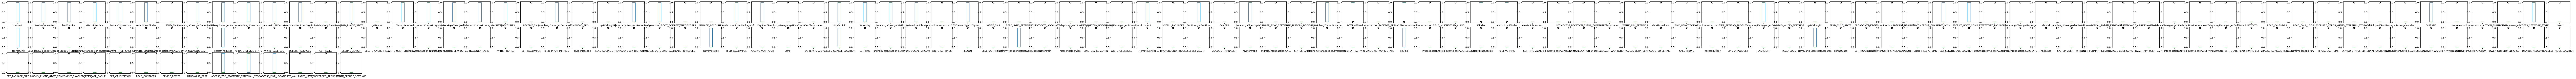

In [ ]:
plt.figure(figsize=(20,15))
df.drop('class',axis=1).plot(kind='box',subplots=True,layout=(100,100),figsize=(200,200),sharex=False,sharey=False)
plt.show()

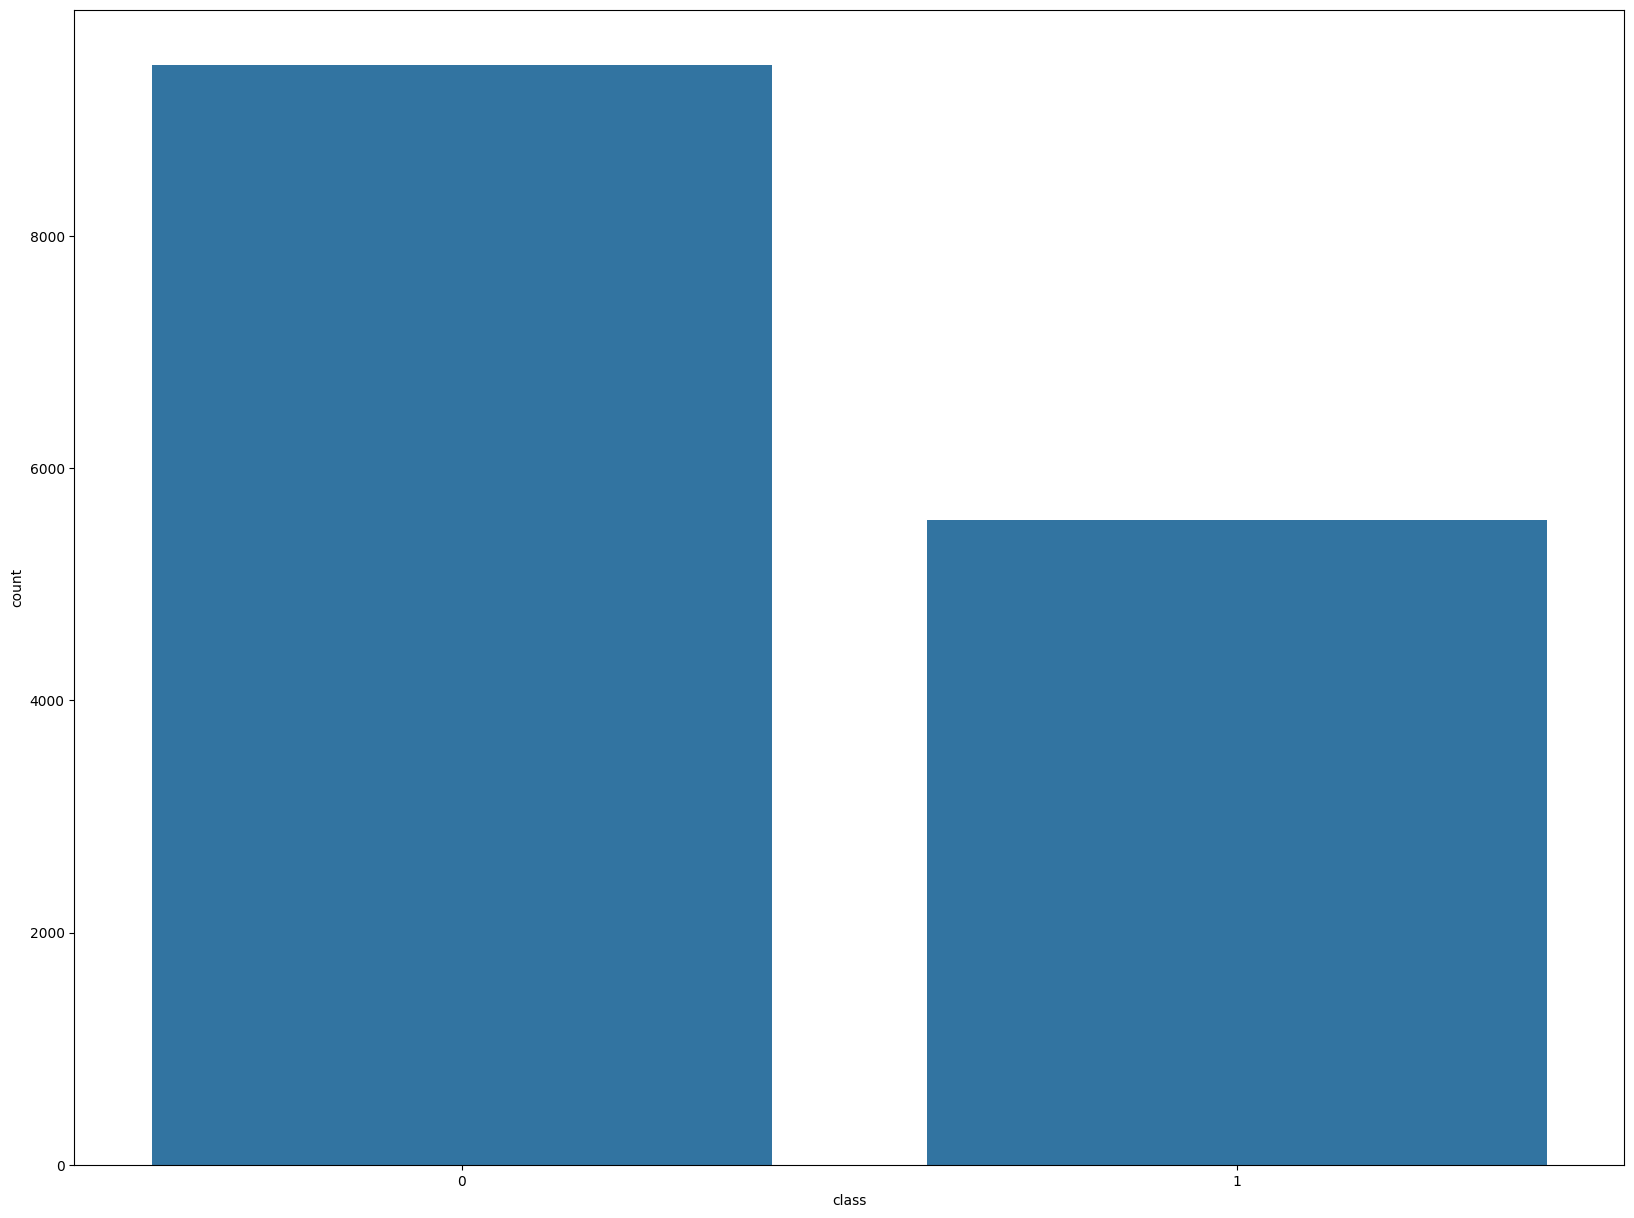

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(x='class',data=df)
plt.show()

In [ ]:
from sklearn import preprocessing


In [ ]:
df.describe()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
count,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,...,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000
mean,0.426585,0.446743,0.442818,0.413346,0.445080,0.487060,0.236711,0.330916,0.282483,0.312687,...,0.233384,0.017431,0.004258,0.434569,0.666356,0.290932,0.016034,0.007052,0.044974,0.369570
std,0.494597,0.497172,0.496736,0.492450,0.496991,0.499849,0.425077,0.470559,0.450222,0.463603,...,0.422999,0.130874,0.065115,0.495717,0.471530,0.454207,0.125609,0.083683,0.207253,0.482704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.DEVICE_POWER.value_counts()

,count
DEVICE_POWER,
0.0,9505
1.0,166


In [ ]:
pd.crosstab(df.CAMERA,df.ClassLoader)

ClassLoader,0,1
CAMERA,,
0,5206,3465
1,253,747


<Axes: >

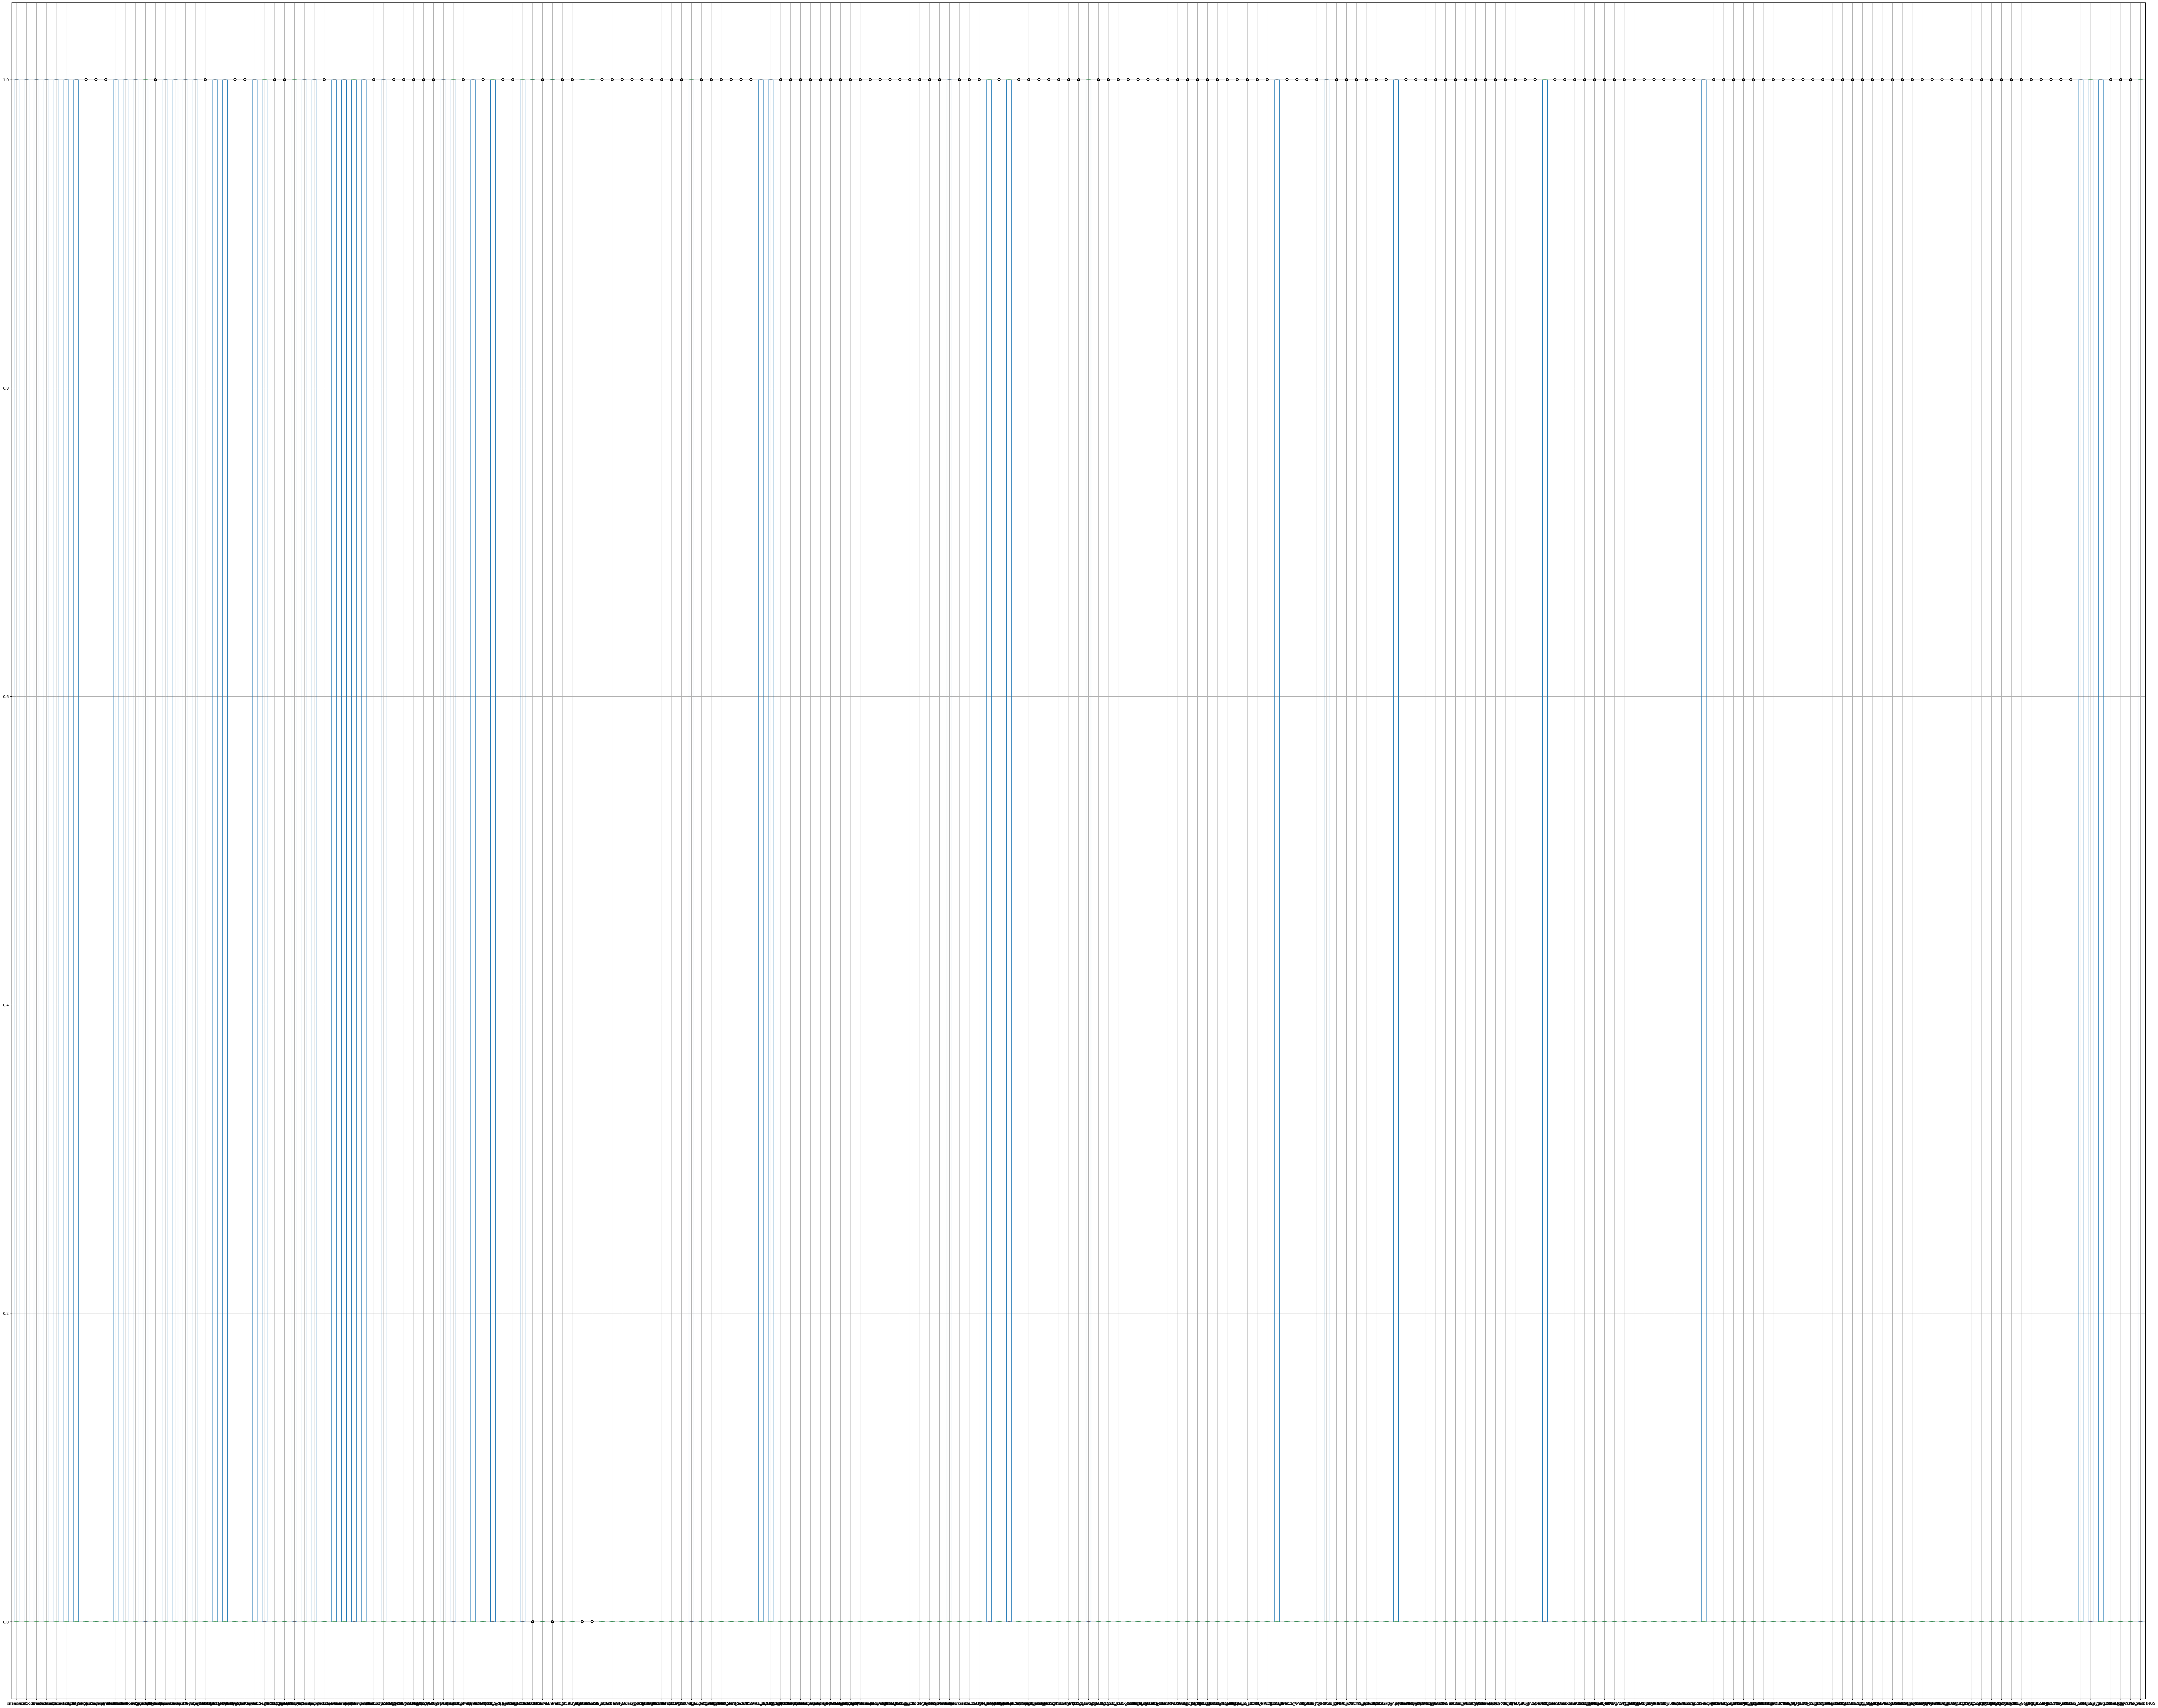

In [ ]:
plt.figure(figsize=(100,80))
df.boxplot()

In [ ]:
df

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,1,1,1,1,1,1,0,1,1,1,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
9672,1,1,1,1,1,1,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9673,1,1,1,1,1,1,0,1,1,0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
9674,1,1,1,1,1,1,0,1,1,1,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
pd.plotting.scatter_matrix(df,c=df['class'],s=150,figsize=[50,50])

In [ ]:
x = df.iloc[:,1:-1].values.tolist()
x = df.iloc[:,-1].values.tolist()
x = np.reshape(x,(-1,215))
x = x.tolist()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)

از اینجا مدل Knn شروع میشه


In [ ]:
dataset = pd.read_csv('malware_dataset.csv')

<ipython-input-25-020440350070>:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('malware_dataset.csv')


In [ ]:
label_encoder = LabelEncoder()
dataset['class'] = label_encoder.fit_transform(dataset['class']) #تبدیل به عدد
dataset.replace('?',np.nan,inplace=True)
dataset = dataset.dropna()

In [ ]:
X = dataset.drop(columns=['class'])  # ویژگی‌ها
y = dataset['class']                 # هدف (کلاس‌ها)

In [ ]:

# تقسیم داده‌ها به دو بخش آموزش و تست (۸۰٪ آموزش و ۲۰٪ تست)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.979381443298969
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1886
           1       0.98      0.96      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.98      0.98      0.98      3007
weighted avg       0.98      0.98      0.98      3007



In [ ]:
xc = pd.read_excel("/content/search_results_malware1.xlsx")
xr = knn.predict(xc)
xr

array([1])

In [ ]:
xb = pd.read_excel("/content/search_results_bankmelat.xlsx")
xt = knn.predict(xb)
xt

array([0])